In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
from IPython.display import display, Image


In [2]:
class Tablero:
    def __init__(self):
        self.tablero = np.full((10, 10), " ")

    def introducir_barco(self, size, nseo, x, y):
   
        for i in range(0, size):
            if nseo == "N":
                self.tablero[x - i, y] = "O"
            if nseo == "S":
                self.tablero[x + i, y] = "O"
            if nseo == "E":
                self.tablero[x, y + i] = "O"
            if nseo == "O":
                self.tablero[x, y - i] = "O"
        
    def full_box(self, size, nseo, x, y):
        full_box = False
        for i in range(0, size):
            if nseo == "N" and ((x - size + 1) < 0 or self.tablero[x - i, y] in ["O"]):
                full_box = True
            if nseo == "S" and ((x + size) > 10 or self.tablero[x + i, y] in ["O"]):
                full_box = True
            if nseo == "E" and ((y + size) > 10 or self.tablero[x, y + i] in ["O"]):
                full_box = True
            if nseo == "O" and ((y - size + 1) < 0 or self.tablero[x, y - i] in ["O"]):
                full_box = True
        return full_box
    
    
    def init_tablero_aleatorio(self):
        crucero, fragata, destructor, acorazado = 0, 0, 0, 0

        while crucero < 4 or fragata < 3 or destructor < 2 or acorazado < 1:
            if crucero < 4:
                nseo = np.random.choice(["N", "S", "E", "O"])
                coordX = np.random.randint(10)
                coordY = np.random.randint(10)
                if not self.full_box(1, nseo, coordX, coordY):
                    self.introducir_barco(1, nseo, coordX, coordY)
                    crucero += 1
            if fragata < 3:
                nseo = np.random.choice(["N", "S", "E", "O"])
                coordX = np.random.randint(10)
                coordY = np.random.randint(10)
                if not self.full_box(2, nseo, coordX, coordY):
                    self.introducir_barco(2, nseo, coordX, coordY)
                    fragata += 1
            if destructor < 2:
                nseo = np.random.choice(["N", "S", "E", "O"])
                coordX = np.random.randint(10)
                coordY = np.random.randint(10)
                if not self.full_box(3, nseo, coordX, coordY):
                    self.introducir_barco(3, nseo, coordX, coordY)
                    destructor += 1
            if acorazado < 1:
                nseo = np.random.choice(["N", "S", "E", "O"])
                coordX = np.random.randint(10)
                coordY = np.random.randint(10)
                if not self.full_box(4,nseo, coordX, coordY):
                    self.introducir_barco(4, nseo, coordX, coordY)
                    acorazado += 1
                    


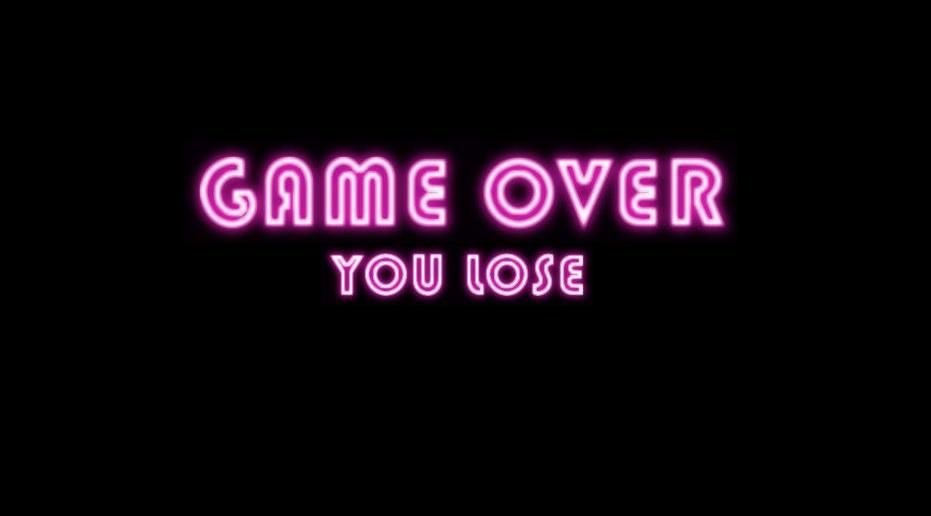

In [4]:
game_over=(Image(filename='img/game_over.png'))
game_over

In [4]:
print("Bienvenido al juego ")

display(Image(filename='img/combate_naval.png'))


jug1 = Tablero()
jug1Impactos = Tablero()
jug2 = Tablero()
jug2Impactos = Tablero()

jug1.init_tablero_aleatorio()
type(jug1.init_tablero_aleatorio)
jug2.init_tablero_aleatorio()

print("Tablero inicial del jugador 1")
print(pd.DataFrame(jug1.tablero))
print("\nTablero de impactos del jugador 1")
print(pd.DataFrame(jug1Impactos.tablero))
aciertos_jug1 = 0
aciertos_jug2 = 0
turno_jugador = 1
fin = False

try:
    while (aciertos_jug1 < 10 and aciertos_jug2 < 10) and not fin:
        while turno_jugador == 1:
            x = int(input("Introduce horizontal X entre 0 y 9: "))
            y = int(input("Introduce vertical Y entre 0 y 9: "))

            if x > 9 or y > 9:
                print("\nError: Cordenadas no validas. Intenta de nuevo.")
                print("(Para terminar introduce una letra.)")
                break
            elif jug1Impactos.tablero[x, y] == "X" or jug1Impactos.tablero[x, y] == "A":
                print("\nPosicion ya tomada. Meter nuevas coordenadas.\n")
                break
            elif jug2.tablero[x, y] == "O":
                jug1Impactos.tablero[x, y] = "X"
                aciertos_jug1 += 1
                print("\n¡Le has dado!")
                print("Aciertos Jugador 1:", aciertos_jug1, "\n")
                print("Mi Tablero principal\n")
                print(pd.DataFrame(jug1.tablero), "\n")
                print("Mi Tablero de impactos\n")
                print(pd.DataFrame(jug1Impactos.tablero), "\n")

                if aciertos_jug1 == 3:
                    fin = True
                    print("Ganó el jugador 1")
                    break

            elif jug2.tablero[x, y] == " ":
                jug1Impactos.tablero[x, y] = "A"
                turno_jugador = 2
                print("\n¡Agua!")
                print("Aciertos Jugador 1:", aciertos_jug1, "\n")
                print("Mi Tablero principal\n")
                print(pd.DataFrame(jug1.tablero), "\n")
                print("Mi Tablero de impactos\n")
                print(pd.DataFrame(jug1Impactos.tablero), "\n")

        while turno_jugador == 2 and not fin:

            x = np.random.randint(10)
            y = np.random.randint(10)

            if jug2Impactos.tablero[x, y] == "X" or jug2Impactos.tablero[x, y] == "A":
                break

            elif jug1.tablero[x, y] == "O":
                jug1.tablero[x, y] = "X"
                jug2Impactos.tablero[x, y] = "X"
                aciertos_jug2 += 1
                print("\n¡Barco alcanzado!")
                print("Aciertos Jugador 2:", aciertos_jug2, "\n")
                print("Mi Tablero principal\n")
                print(pd.DataFrame(jug1.tablero), "\n")

                if aciertos_jug2 == 10:
                    fin = True
                    print("Ganó el jugador 2")
                    

            elif jug1.tablero[x, y] == " ":
                jug1.tablero[x, y] = "A"
                jug2Impactos.tablero[x, y] = "A"
                turno_jugador = 1
                print("\n¡Agua!")
                print("Aciertos Jugador 2:", aciertos_jug2, "\n")
                print("Mi Tablero principal\n")
                print(pd.DataFrame(jug1.tablero), "\n")


except ValueError:
    print("\nJuego terminado.")

Bienvenido al juego 


Tablero inicial del jugador 1
   0  1  2  3  4  5  6  7  8  9
0                    O         
1                          O   
2                              
3  O  O  O  O  O  O  O     O   
4                          O   
5     O  O              O      
6     O  O                     
7     O                    O   
8        O                 O   
9                              

Tablero de impactos del jugador 1
   0  1  2  3  4  5  6  7  8  9
0                              
1                              
2                              
3                              
4                              
5                              
6                              
7                              
8                              
9                              
Introduce horizontal X entre 0 y 9: 1
Introduce vertical Y entre 0 y 9: 2

¡Agua!
Aciertos Jugador 1: 0 

Mi Tablero principal

   0  1  2  3  4  5  6  7  8  9
0                    O         
1                          O   
2      

KeyboardInterrupt: Interrupted by user

In [7]:
import os
import time

In [19]:
espacios=" "
for i in range(10):
    os.system("clear")

    print()
    print("HAS GANADO")
    print("{} \ O /  ".format(espacios))
    print("{}   |    ".format(espacios))
    print("{} /   \  ".format(espacios))

    espacios +=" "

    time.sleep(0.3)
    os.system("clear")

    print()
    print("HAS GANADO")
    print("{}  __O__   ".format(espacios))
    print("{}    |     ".format(espacios))
    print("{}  /   |   ".format(espacios))
    

    espacios +=" "
    time.sleep(0.3)
    os.system("clear")

    print()
    print("HAS GANADO")
    print("{}     O    ".format(espacios))
    print("{}  /  | \  ".format(espacios))
    print("{}   |  \   ".format(espacios))

    espacios +=" "
    time.sleep(0.3)
    os.system("clear")



HAS GANADO
  \ O /  
    |    
  /   \  

HAS GANADO
    __O__  
       |  
    /  |   

HAS GANADO
        O    
     /  | \  
      |  \   

HAS GANADO
     \ O /  
       |    
     /   \  

HAS GANADO
       __O__  
          |  
       /  |   

HAS GANADO
           O    
        /  | \  
         |  \   

HAS GANADO
        \ O /  
          |    
        /   \  

HAS GANADO
          __O__  
             |  
          /  |   

HAS GANADO
              O    
           /  | \  
            |  \   

HAS GANADO
           \ O /  
             |    
           /   \  

HAS GANADO
             __O__  
                |  
             /  |   

HAS GANADO
                 O    
              /  | \  
               |  \   

HAS GANADO
              \ O /  
                |    
              /   \  

HAS GANADO
                __O__  
                   |  
                /  |   

HAS GANADO
                    O    
                 /  | \  
                  |  \   

HAS GANADO
   